# Cuaderno de Regresión

Con este cuaderno se estudiarán métodos de regresión empleando diferentes técnicas para calcular la regresión. También se eplearán modelos pre existentes en la librería scikit-learn
para analizar el dataset ice_cream_revenue

## Sección 1: Uso del algoritmo de mínimos cuadrados para encontrar un modelo
En la primera sección se emplearán modelos de regresión encontrados con el método de mínimos cuadrados que se basa en encontrar la solución óptima para un problema de la forma
$$ Ax=b $$ y puede ser resuelto con álgebra lineal.


In [21]:
import numpy as np
import matplotlib.pyplot as plt


### 1.1 Modelo lineal
Se trabajará con datos artificialmente generados. Creamos datos basados en la ecuación de una línea recta, luego agregamos ruido y graficamos los datos para tener una visualización de su comportamiento
El ruido que se agrega es de naturaleza Gaussiana, con media cero y desviación estándar de 0.75. Se crean 100 datos para efectos de una visualización adecuada

Text(0.5, 1.0, 'Dataset generado')

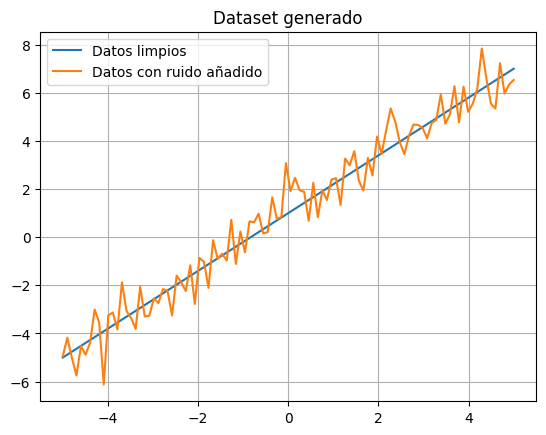

In [22]:
datos_x = np.linspace(-5, 5, 100) # 100 datos del 0 al 20
pendiente = 1.2
intersecto = 1
datos_y = datos_x * pendiente + intersecto

# agregar ruido a los datos
datos_y_ruido = np.random.normal(0,0.75,100) + datos_y
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.legend(["Datos limpios", "Datos con ruido añadido"])
plt.grid()
plt.title("Dataset generado")

### 1.2 Creación del modelo
posteriormente se crea el modelo y las matrices para resolver el problema de optimización de la forma
$$
A\times x = b
$$

En donde, en la matriz $A$ se colocan los valores independientes (x) y una columna de unos para multiplicar la matriz de parámetros ( a encontrar) $b$. La solución del sistema se puede hallar con la pseudo inversa de Moore penrose, disponible en `numpy.linalg.pinv()`


In [23]:
A = np.array([datos_x, np.ones(len(datos_x))]).T
b = datos_y_ruido
parametros_b = np.linalg.pinv(A).dot(b)
print("Los parametros son: ", parametros_b)

Los parametros son:  [1.20157089 1.06116221]


Text(0.5, 1.0, 'Modelo de regresión lineal')

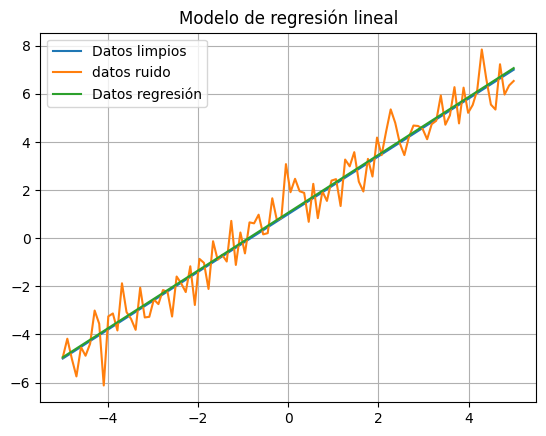

In [24]:
# A partir de los datos con ruido se puede crear un nuevo modelo que se ajuste minimizando el error cuadrático
plt.plot(datos_x, datos_y)
plt.plot(datos_x, datos_y_ruido)
plt.plot(datos_x, datos_x*parametros_b[0]+parametros_b[1])
plt.legend(["Datos limpios","datos ruido", "Datos regresión"])
plt.grid()
plt.title("Modelo de regresión lineal")

## Sección 2: Análisis y  Regresión del dataset Ice-cream-revenue
### 2.1 Análisis exploratorio de los datos

Se empleará el dataset ice-cream-revenue que tiene las columnas de temperatura y cantidad vendida de helados. Utilizando scikit-learn se crearán modelos de regresión. El dataset se preprocesará para poder tener datos de evaluación del modelo


In [25]:
import pandas as pd
import sklearn
import seaborn as sns


In [26]:
df_helados = pd.read_csv("multiple.csv")
#df_helados.head()
df_helados

,Y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


In [27]:
df_helados.info
df_helados.describe()

,Y,x1,x2,x3,x4
count,13.000000,13.000000,13.000000,13.000000,13.00000
mean,95.423077,7.461538,48.153846,11.769231,30.00000
std,15.043723,5.882394,15.560881,6.405126,16.73818
min,72.500000,1.000000,26.000000,4.000000,6.00000
25%,83.800000,2.000000,31.000000,8.000000,20.00000
50%,95.900000,7.000000,52.000000,9.000000,26.00000
75%,109.200000,11.000000,56.000000,17.000000,44.00000
max,115.900000,21.000000,71.000000,23.000000,60.00000


In [28]:
df_helados.describe()

,Y,x1,x2,x3,x4
count,13.000000,13.000000,13.000000,13.000000,13.00000
mean,95.423077,7.461538,48.153846,11.769231,30.00000
std,15.043723,5.882394,15.560881,6.405126,16.73818
min,72.500000,1.000000,26.000000,4.000000,6.00000
25%,83.800000,2.000000,31.000000,8.000000,20.00000
50%,95.900000,7.000000,52.000000,9.000000,26.00000
75%,109.200000,11.000000,56.000000,17.000000,44.00000
max,115.900000,21.000000,71.000000,23.000000,60.00000


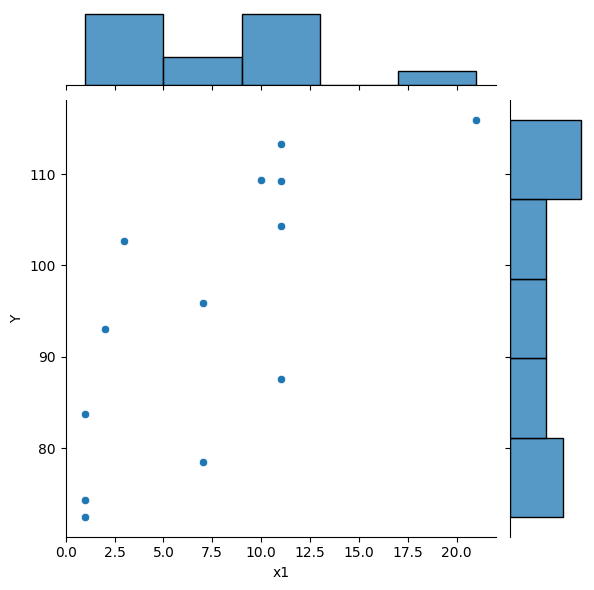

In [29]:
#sns.jointplot(x="Temperature", y="Revenue", data=df_helados)
sns.jointplot(x="x1", y="Y", data=df_helados)

### 2.2 Preparando los datos
Particionando el dataset para la creación de modelos. Esto mediante la función `train_test_split` de scikit-learn


In [30]:
from sklearn.model_selection import train_test_split

# extrayendo la información del dataset
X = df_helados[["x1"]]
y = df_helados["Y"]

# particionando en dos conjuntos _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(X_train.shape)

(9, 1)


### 2.3 modelo de regresión lineal
Emplearemos el modelo `LinearRegression` de scikit-learn para ajustar los datos

In [31]:
from sklearn.linear_model import LinearRegression

# crear el modelo
regressor = LinearRegression(fit_intercept = True)
# entrenarlo con los datos
regressor.fit(X_train, y_train)

# el modelo tendrá dos parámetros (A y B fueron llamados en el documento)
# se pueden mostrar con la función print
print(f"La pendiente del modelo (B) es: {regressor.coef_}, el intersecto (A) es {regressor.intercept_}")


La pendiente del modelo (B) es: [2.29838918], el intersecto (A) es 76.05715206185566


### 2.4 Evaluación del modelo

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura')

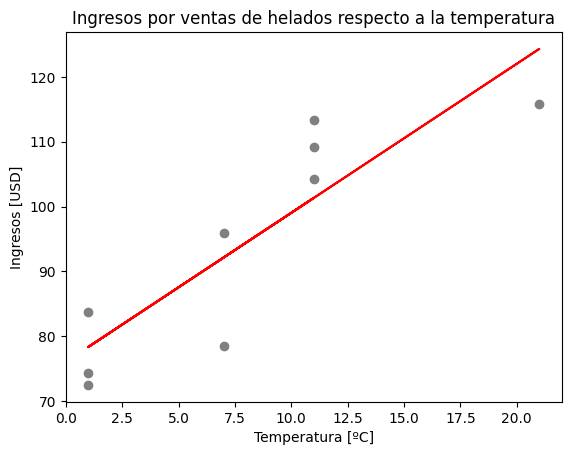

In [32]:
y_pred = regressor.predict(X_test)
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura')

Text(0.5, 1.0, 'Ingresos por ventas de helados respecto a la temperatura (test data)')

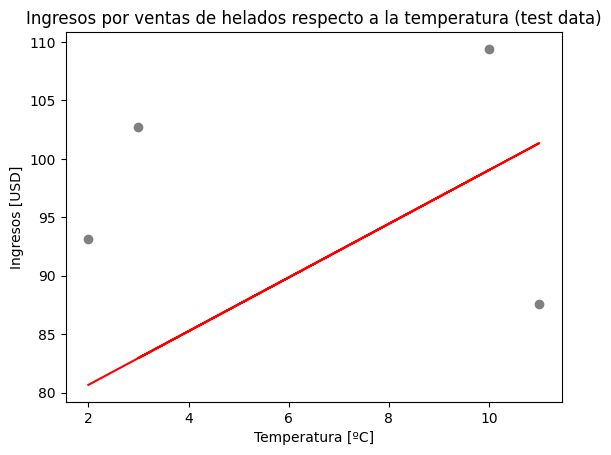

In [33]:
# VISUALIZE TEST SET RESULTS
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, regressor.predict(X_test), color = 'red')
plt.ylabel('Ingresos [USD]')
plt.xlabel('Temperatura [ºC]')
plt.title('Ingresos por ventas de helados respecto a la temperatura (test data)')



### Error medio cuadrático
Es una de las medidas más empleadas como función de pérdida en los algoritmos de regresión. Mide la distancia cuadrática entre una predicción del modelo respecto al dato correspondiente en el conjunto de datos para todos los puntos que tenga el conjunto de datos. Luego calcula el promedio de esas distancias.



In [34]:
# evaluando el comportamiento del modelo
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test, y_pred)))



Mean Squared Error: 210.23888049548657
Root Mean Squared Error: 14.49961656374011


# Error medio absoluto
Es la diferencia entre los valores estimados y los reales. Se calcula el promedio de todas las diferencias para encontrar el valor del error


## Tarea:

Error cuadratico medio == mse (mean squared error)

```
# Error medio absoluto == mae (mean_absolute_error)

absolute = abs() en Python

| x | = +x, si x>=0
| x | = -x, si x<=0

Ejemplo:
| (5) | = +(5) = +5 = 5
| (-5) | = -(-5) = +5 = 5

15 = | 40 - 25 | = | 15 | = 15
15 = | 25 - 40 | = | -15 | = -(-15)= 15

def get_mean_absolute_error(y_real, y_pred):
  mae = | (y_real) - (y_pred) |
  # mae = | (y_pred) - (y_real) |
  return mae
```


RECORDAR HACER LA GRÁFICA DE LA DISTRUBUCIÓN DE LOS RESIDUOS (histograma de error)


In [35]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 14.07303479381444


### R cuadrado
Es una medida estadística que indica que tan cerca estan los datos de ajustarse a una línea recta. Se conoce también como el coeficiente de determinación.

In [36]:
from sklearn.metrics import r2_score
print("R^2:",r2_score(y_test, y_pred))

R^2: -1.9604855382030038


# Sección 3: regresión polinómica

Se crearán datos sintéticos para realizar la regrresión a un polinomio.


Text(0.5, 1.0, 'Dataset generado')

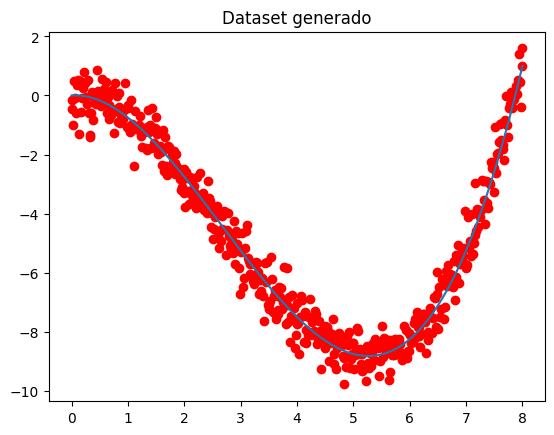

In [37]:
x_data = np.linspace(0,8,500) # datos en X
y_data = 0.125*x_data**3 - x_data**2 + 0.125*x_data  # polinomio con los datos (cúbico)
y_data2 = np.random.normal(0,0.50,500) + y_data
plt.scatter(x_data, y_data2, c='r', )
plt.plot(x_data, y_data) # graficar los datos
plt.title("Dataset generado")

Para la regresión con un polinomio, se necesita preprocesar los datos `x_data` para que modelen un polinomio del grado indicado. Esto es, crear la matriz A para resolver el problema de la forma $Ax = b$, las dimensiones de la matriz A son de $m\times m$ siendo m el grado del polinomio

**Ejercicio**: Variar el grado del polinomio. Los datos corresponden a un polinomio de tercer grado, Se puede apreciar que con grados inferiores los datos van a tener un mal ajuste y con grados superiores puede existir sobre entrenamiento, por ejemplo de grado 20 se empiezan a notar problemas de ajuste

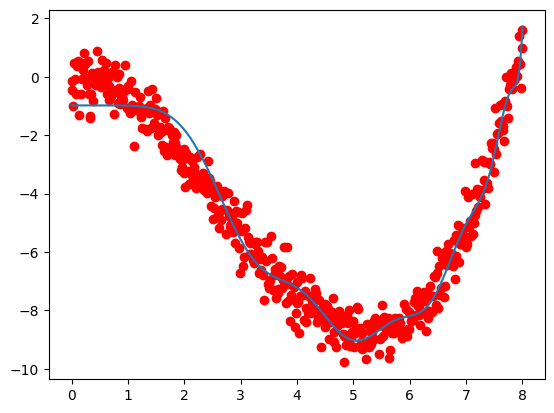

In [38]:
# creando un objeto para la regresión polinómica

from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=20)
poly_features = poly_regressor.fit_transform(x_data.reshape(-1,1))
# como un polinomio sigue haciendo parte de los modelos de regresión linea, empleamos la clase LinealRegression
model = LinearRegression()
model.fit(poly_features, y_data)

y_pred = model.predict(poly_features)

plt.scatter(x_data, y_data2, c='r')
plt.plot(x_data, y_pred)




** Regresion lineal multiple** **ejercicio**

In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("multiple.csv")
#df_helados.head()
df



,Y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33
5,109.2,11,55,9,22
6,102.7,3,71,17,6
7,72.5,1,31,22,44
8,93.1,2,54,18,22
9,115.9,21,47,4,26


In [40]:
df.info
df.describe()

,Y,x1,x2,x3,x4
count,13.000000,13.000000,13.000000,13.000000,13.00000
mean,95.423077,7.461538,48.153846,11.769231,30.00000
std,15.043723,5.882394,15.560881,6.405126,16.73818
min,72.500000,1.000000,26.000000,4.000000,6.00000
25%,83.800000,2.000000,31.000000,8.000000,20.00000
50%,95.900000,7.000000,52.000000,9.000000,26.00000
75%,109.200000,11.000000,56.000000,17.000000,44.00000
max,115.900000,21.000000,71.000000,23.000000,60.00000


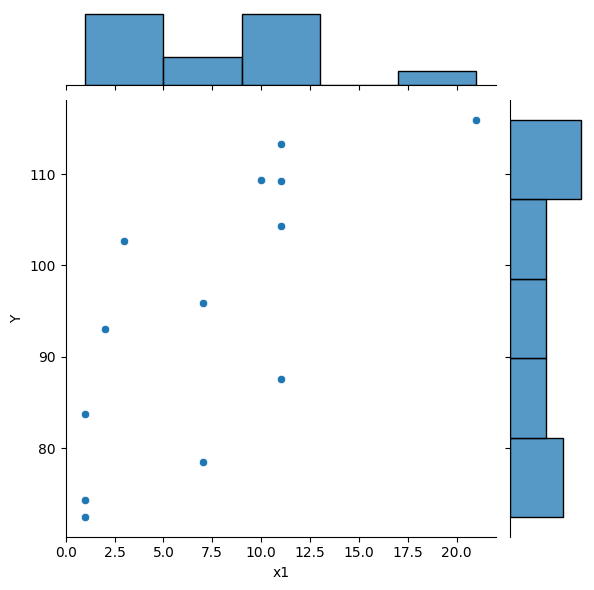

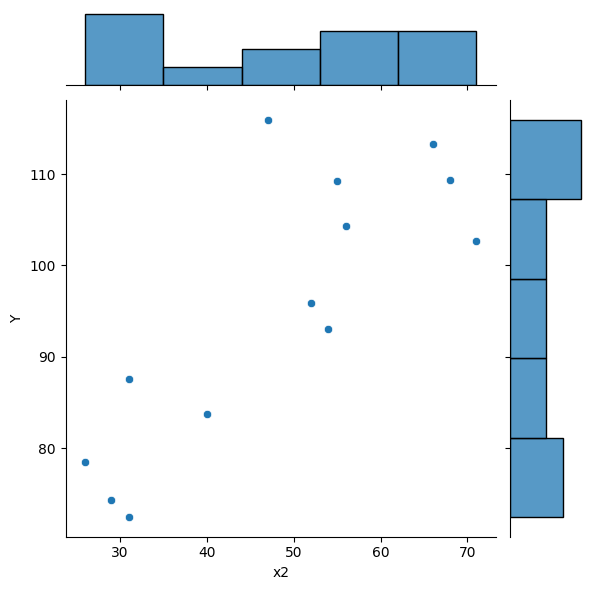

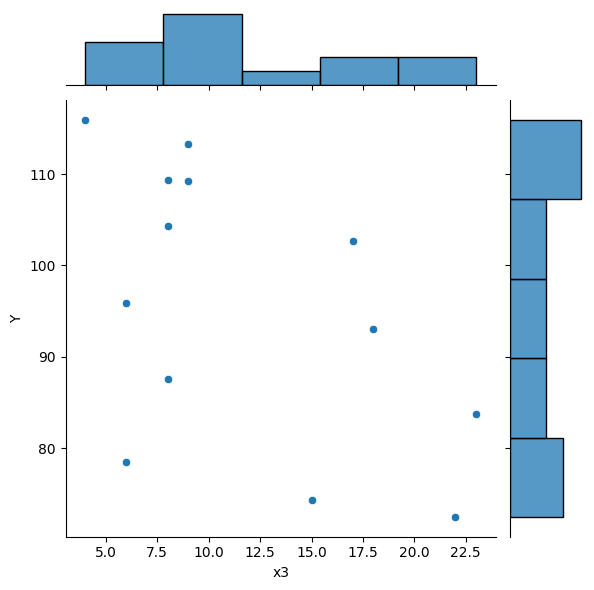

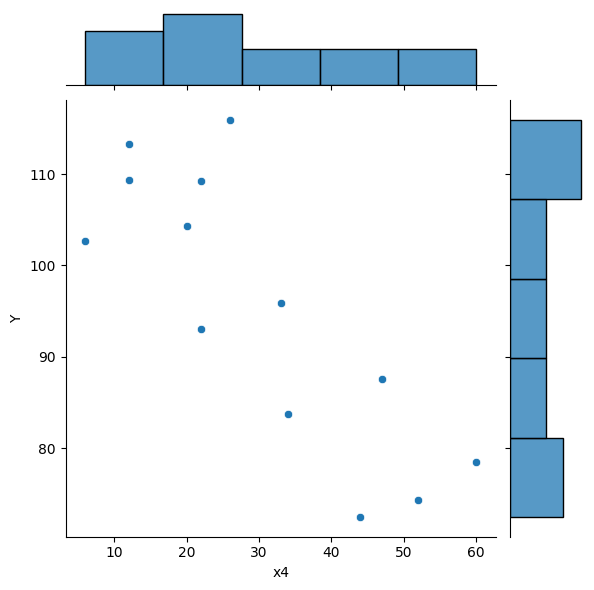

In [41]:
#sns.jointplot(x="Temperature", y="Revenue", data=df_helados)
# Crear un array de los nombres de las variables independientes
variables = ['x1', 'x2', 'x3', 'x4']

# Crear figuras para cada relación
for var in variables:
    sns.jointplot(x=var, y="Y", data=df)
    plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Extrayendo la información del dataset para múltiples variables
X = df[["x1","x2","x3","x4"]]  # Incluye x2, x3, x4 junto con x1
y = df["Y"]

# Particionando en dos conjuntos, _train y _test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Imprimiendo las dimensiones de X_train para ver cuántos ejemplos y características tenemos
X_train.shape



(9, 4)